Assignment \#3: Linear State Space Models
=========================================

Please answer all three questions below within a Jupyter notebook.

**Due: 03rd March, 2016**

Submission of the assignment is due before 9:30am to econ370nyu@gmail.com. 

Please use the following standard for the subject email title ``assignment#3-<lastname>-<id>``.


# Question 1

Consider the following ARMA(2,1) process

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t+\theta w_{t-1}$$

(1) Write down the linear state space system to represent the equations above

(2) Assume that $\phi_1=1.8$, $\phi_2=-0.81$, $\theta=0.5$, and $w_t\sim \mathcal N(0,1)$. Plot the impulse reponse graph for this system. (Hint: assume $w_t=0$ for $t\leq 0$, and assume $w_t=1$ for $t=1$.)

(3) Simulate the economy for 1000 periods, and plot the simulated path for $y_t$. You can choose the starting value of $y_t$ as you like.

(4) Change the parameters to be the following: $\phi_1=-2.0$, $\phi_2=0.75$, $\theta=0.0$, and $w_t\sim \mathcal N(0,1)$.  Plot the impulse reponse graph for this system. Is this a mean-reverting process?

#Answer 1#

###(1)###

$$
    x_t=
    \begin{bmatrix}
        y_t \\
        y_{t-1} \\
        w_t
    \end{bmatrix}
    \qquad
    A_t = \begin{bmatrix}
              \phi_1 & \phi_2 & \theta \\
              1 & 0 & 0  \\
              0 & 0 & 0
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        1 \\
        0 \\
        1
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
$$

###(2)###

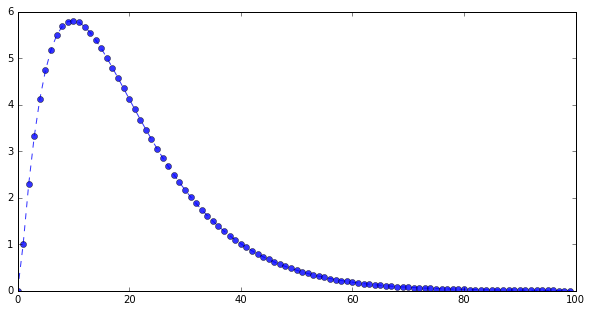

In [25]:
#Simulated path for y_t, N=1000
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# N: number of periods for the transition

# std: st.d of innovation

N = 100
std = 1.0
phi_1 = 1.8
phi_2 = -0.81
theta = 0.5

A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
 
C = np.array([1,0,1]) 
 
G = np.array([1,0,0]) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std

#Simul_shock = np.random.normal(0, std, N)
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([0,0,0]) #choosing the [*,0,0] element sets the y_t for the ARMA?
Simul_y = np.zeros(N)

for i in range(0,N):    
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i]) 
    #Simul_x each row represents the state vector for that time. row 0 = x_0, row 1 = x_1 ...
    Simul_y[i] = np.dot(G, Simul_x[i,:]) 
    #Simul_y represents the choice vector [y_0, y_1, ... , y_N]  
        
# Plot the simulation
 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    

###(3)###

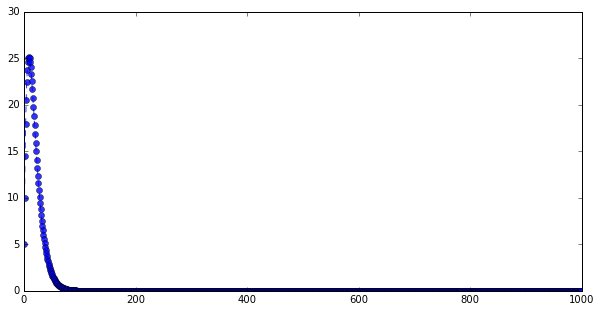

In [33]:
#Simulated path for y_t, N=1000
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# N: number of periods for the transition

# std: st.d of innovation

N = 1000 
std = 1.0
phi_1 = 1.8
phi_2 = -0.81
theta = 0.5

A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
 
C = np.array([1,0,1]) 
 
G = np.array([1,0,0]) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std

#choose y_t
y_t = 5

#Simul_shock = np.random.normal(0, std, N)
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([y_t,0,0])
Simul_y = np.zeros(N)

for i in range(0,N):    
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i]) 
    Simul_y[i] = np.dot(G, Simul_x[i,:])  
        
# Plot the simulation
 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    

###(4)###

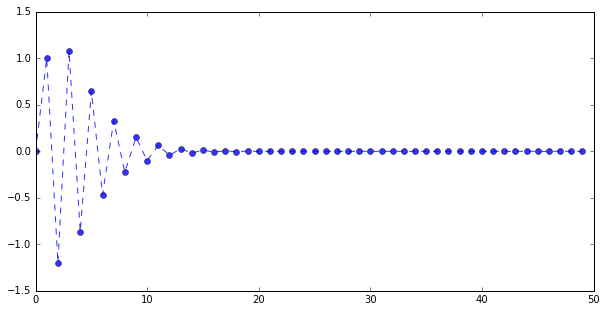

In [30]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# N: number of periods for the transition

# std: st.d of innovation

N = 50
std = 1.0
phi_1 = -1.2
phi_2 = -0.36
theta = 0.0

A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
 
C = np.array([1,0,1]) 
 
G = np.array([1,0,0]) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std

#Simul_shock = np.random.normal(0, std, N)
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([0,0,0]) 
Simul_y = np.zeros(N)

for i in range(0,N):    
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i]) 
    Simul_y[i] = np.dot(G, Simul_x[i,:]) 
          
# Plot the simulation
 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    

Answer: **Yes this is a mean reverting process** because the process converges to the mean, 0. 

# Question 2

Consider the following AR(2) process 

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t$$

(1) Write down the linear state space system to represent the equations above

(2) State the condition on $\phi_1$ and $\phi_2$ for co-variance stationary. 

(3) Assume $\phi_1=-1.6$, $\phi_2=0.64$. Start from $y_{-1}=0$ and $y_{-2}=0$, simulate the system for $N=200$ periods and repeat it for $S=500$ times. Plot the sample distribution of $y_t$ at $t=10$, $t=100$ and $t=150$. 

(4) Use the same parameter as in part (3). Plot the stationary distribution of $y_t$.
 

#Answer 2#

###(1)### 

$$
    x_t=
    \begin{bmatrix}
        y_t \\
        y_{t-1} \\
    \end{bmatrix}
    \qquad
    A_t = \begin{bmatrix}
              \phi_1 & \phi_2 \\
              1 & 0   \\
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        1 \\
        0 \\
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix} 1 & 0 \end{bmatrix}
$$

###(2)###

As defined in the lecture notes:


A  process $\{x_t\}$ is said to be covariance stationary if:

#### $\mu_t$ and $\Sigma_t$ are constant in $t$

#### $\Sigma_{t+j,t}$ depends on the time gap $j$ but not on time $t$

In our setting, $\{x_t\}$ will be covariance stationary if $\mu_0, \Sigma_0, A, C$  assume values that  imply that none of $\mu_t, \Sigma_t, \Sigma_{t+j,t}$ depends on $t$.


--------------------------------------------------------------------

$\mu_t$ is defined as $E[x_{t}]=A^{t}\mu_0=\mu_t$

$\Sigma_t$ is defined as $\Sigma_t = A\Sigma_{t-1}A'+CC'$

Using these definitions, we know that:

$E[y_t]=G E[x_t] = GA^t\mu_0$

$Cov(y_t)=G\Sigma_tG'$

According to the claim described in class, we know that the distributions of $x_t$ and $y_t$ will converge over time *only if the eigenvalues of A have an absolute value of less than one*. If this is the case then $\lim_{t\to\infty}A^t$ is bounded.

For:
$$
\qquad
A_t = \begin{bmatrix}
              \phi_1 & \phi_2 \\
              1 & 0   \\
        \end{bmatrix}
\qquad
$$

We calculate the eigenvalues by taking $det(A_t-\lambda I)$. 

$$
\qquad
A_t = \begin{bmatrix}
              \phi_1-\lambda & \phi_2 \\
              1 & -\lambda   \\
        \end{bmatrix}
\qquad
$$

The taking the determinant we get:
$(\phi_1 - \lambda)(-\lambda) - (\phi_2)(1) =\lambda^2 - \lambda \phi_1 - \phi_2 = 0$


We know that the quadratic factors has two factors, so let's call those factors $\rho_1$ and $\rho_2$. 


$=(\lambda + \rho_1)(\lambda - \rho_2) = 0$

$=\lambda^2 - \rho_2 \lambda + \rho_1 \lambda - \rho_1 \rho_2 = 0$

$=\lambda^2 + (\rho_1 + \rho_2)\lambda - \rho_1 \rho_2 = 0$

Thus $\phi_1 = \rho_1 - \rho_2$ and $\phi_2 = \rho1 \rho2$. 

The conditions for stationarity are that $|\rho_1| \leq 1$ and $|\rho_2| \leq 1$. 

###(3)###

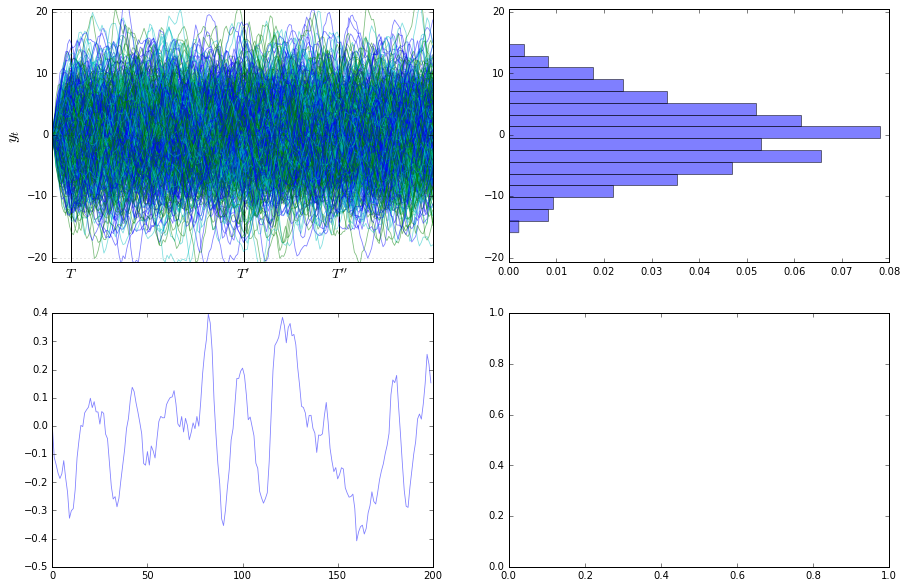

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random

# == Setup Parameters for the Model == #

phi_0 = 0
phi_1 = 1.6
phi_2 = -0.64
std = 1
N = 200
S = 500

# == Setup the simulation == #

mu_0 = np.array([phi_0,0,0])
Sigma_0 = np.zeros((3,3))
A = np.array(([1,0,0],[phi_0,phi_1,phi_2],[0,1,0]))     
C = np.array(([0,1,0])) 
C_matrix = np.array(([0,0,0], [0,1,0], [0,0,0])) 
G = np.array(([0,1,0])) 
    
ymin, ymax = -20.8, 20.5

T0 = 10
T1 = 100
T2 = 150

# = Generate Plots = #

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax = axes[0,0]
ax.grid(alpha=0.4)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$y_t$', fontsize=16)
ax.vlines((T0, T1, T2), ymin, ymax)
ax.set_xticks((T0, T1, T2))
ax.set_xticklabels((r"$T$", r"$T'$", r"$T''$"), fontsize=14)

# = Generate Data and plot = #

sample=[]
mean_y=np.zeros(N)
var_y=np.zeros(N)
for j in range(S):
    Simul_shock = np.random.normal(0, std, N)
    Simul_x = np.zeros((N+1,3))
    Simul_x[0,:]=np.array([phi_0,0,0])
    Simul_y = np.zeros(N)
    for i in range(0,N):
        Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
        Simul_y[i] = np.dot(G, Simul_x[i,:])
        mean_y[i]=mean_y[i]+Simul_y[i]/S
    sample.append(Simul_y[T0])
    rcolor = random.choice(('c', 'g', 'b'))
    ax.plot(Simul_y, color=rcolor, lw=0.8, alpha=0.5)

axes[0,1].set_ylim(ymin, ymax)
axes[0,1].hist(sample, bins=16, normed=True, orientation='horizontal', alpha=0.5)  
axes[1,0].plot(mean_y, 'b-', lw=0.8, alpha=0.5)
plt.show()

# = Use function to compute the unconditional moments = #

#mu_y,Sigma_y,mu_x,Sigma_x = unconditional_moments(A, C_matrix, G, mu_0, Sigma_0, T0) 

###(4)###

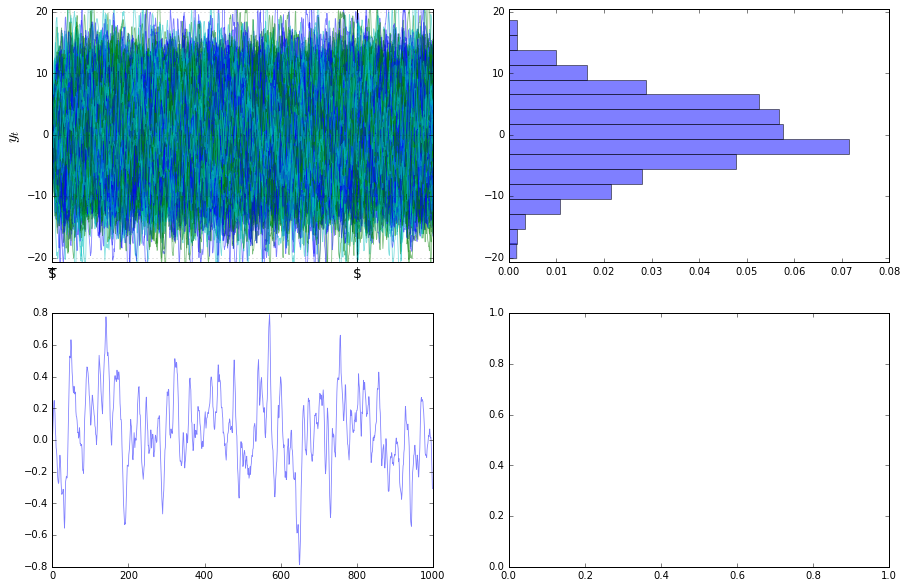

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random

# == Setup Parameters for the Model == #

phi_0 = 0
phi_1 = 1.6
phi_2 = -0.64
std = 1
N = 1000
S = 500

# == Setup the simulation == #

mu_0 = np.array([phi_0,0,0])
Sigma_0 = np.zeros((3,3))
A = np.array(([1,0,0],[phi_0,phi_1,phi_2],[0,1,0]))     
C = np.array(([0,1,0])) 
C_matrix = np.array(([0,0,0], [0,1,0], [0,0,0])) 
G = np.array(([0,1,0])) 
    
ymin, ymax = -20.8, 20.5

T0 = 800
T1 = 0
T2 = 0

# = Generate Plots = #

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax = axes[0,0]
ax.grid(alpha=0.4)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$y_t$', fontsize=16)
ax.vlines((T0, T1, T2), ymin, ymax)
ax.set_xticks((T0, T1, T2))
ax.set_xticklabels((r"$T$"), fontsize=14)

# = Generate Data and plot = #

sample=[]
mean_y=np.zeros(N)
var_y=np.zeros(N)
for j in range(S):
    Simul_shock = np.random.normal(0, std, N)
    Simul_x = np.zeros((N+1,3))
    Simul_x[0,:]=np.array([phi_0,0,0])
    Simul_y = np.zeros(N)
    for i in range(0,N):
        Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
        Simul_y[i] = np.dot(G, Simul_x[i,:])
        mean_y[i]=mean_y[i]+Simul_y[i]/S
    sample.append(Simul_y[T0])
    rcolor = random.choice(('c', 'g', 'b'))
    ax.plot(Simul_y, color=rcolor, lw=0.8, alpha=0.5)

axes[0,1].set_ylim(ymin, ymax)
axes[0,1].hist(sample, bins=16, normed=True, orientation='horizontal', alpha=0.5)  
axes[1,0].plot(mean_y, 'b-', lw=0.8, alpha=0.5)
plt.show()

# = Use function to compute the unconditional moments = #

#mu_y,Sigma_y,mu_x,Sigma_x = unconditional_moments(A, C_matrix, G, mu_0, Sigma_0, T0) 

# Question 3



Consider the Solow growth model discussed in the class:

Production function: 

$$y_t= \exp(z_t) k_t^\alpha$$

Technology: 
    
$$z_t =\rho z_{t-1}+w_t$$    

Saving rate: $$s$$

Consumption: 

$$c_t=(1-s)y_t=(1-s)\exp(z_t) k_t^\alpha$$

Law of motion for capital: 

$$k_{t+1}=(1-\delta)k_t+s y_t=(1-\delta)k_t+s \exp(z_t) k_t^\alpha$$

(1) Log-linearize the  model around the steady state. Write down the log-linearized version of the production function and the law of motion of capital. 

(2) Use the lag opperator, express the log-deviation of output and capital as ARMA processes of the shock $w_t$.

(3) Use the following parameter: $\alpha=0.36$, $\rho=0.95$, $s=0.4$, $\delta=0.1$, and assume $w_t\sim \mathcal N(0,1)$. Simulate the log-deviation of output and capital for 200 periods. Plot the simulated paths of capital and output on the same graph.

#Answer 3#

###(1)###

**Output:**

$y_t = e^{z_t}k_t^\alpha$

Suppose $y_t$ and $k_t$ changes around their steady states $y$ and $k$

$\hat{y_t} = log(\frac{y_t}{y})$ 

$y_t = ye^{\hat{y_t}}$ and $k_t$ follows the same form.

Then $ye^{\hat{y_t}} = e^{z_t}(ke^{{\hat{k_t}})^{\alpha}}$

In the steady-state $z_t = 0$, thus $e^{z_t} = 1$

$\therefore y = k^\alpha$

Thus dividing both sides by $y/k^\alpha$ equivalently, we get:

$= e^{\hat{y_t}} = e^{z_t}(e^{\hat{k_t}})^\alpha$

And taking logs we get:

$\hat{y_t} = z_t + \alpha \hat{k_t}$

**Capital:**

$k_{t+1} = (1-\delta)k_t + se^{z_t} k_t^\alpha$

$k_t$ and $k_{t+1}$ changes around its steady state k.

Therefore:

$ke^{\widehat{k_{t+1}}} = (1-\delta)ke^{\hat{k_t}} + se^{z_t} (ke^{\hat{k_t}})^\alpha$

Dividing by $k$ we get:

$e^{\widehat{k_{t+1}}} = (1-\delta)e^{\hat{k_t}} + \frac{sk^\alpha}{k}e^{z_t}(e^{\hat{k_t}})^\alpha$

Recall: $k_{t+1} = (1-\delta)k_t + sy_t$

In the steady-state: 

$k = (1-\delta)k + sy$

$k - (1-\delta)k = sy$

$\delta k = sy$

Because $y = k^\alpha$

$\delta k = sk^\alpha$

$\delta = \frac{sk^\alpha}{k}$

Thus replacing $\frac{sk^\alpha}{k}$ in our last equation with $\delta$ we get:

$e^{\widehat{k_{t+1}}} = (1-\delta)e^{\hat{k_t}} + \delta e^{z_t}(e^{\hat{k_t}})^\alpha$

Recall from the Taylor Series expansion of $e^x$

$e^x = 1 + x + \frac{1}{2}x^2 + ...$

$ \approx 1+x$

Thus $e^{\widehat{k_{t+1}}} \approx 1+\widehat{k_{t+1}} = (1-\delta)(1+\hat{k_t}) + \delta (1+z_t+\alpha \hat{k_t})$

$=(1-\delta) + (1-\delta)\hat{k_t} + \delta + delta(z_t + \alpha \hat{k_t})$

$\widehat{k_{t+1}} = (1-\delta)\hat{k_t} + \delta z_t + \alpha \delta \hat{k_t}$

$\widehat{k_{t+1}} = \delta z_t + (1-\delta+\alpha \delta)\hat{k_t}$



###(2)### 

**Expressing as ARMA processes**

$\widehat{k_{t+1}} = (1-\delta-\alpha \delta)\hat{k_t} + \delta z_t$

Recall:

$z_t = \rho z_{t-1} + w_t$

$=\rho L z_t + w_t$

$(1-\rho L)z_t = w_t$

$z_t = \frac{1}{1-\rho L}w_t$

Plugging this back into our equation for $\widehat{k_{t+1}}$

$\widehat{k_{t+1}} = (1-\delta-\alpha \delta)\hat{k_t} + \delta(\frac{1}{1-\rho L}w_t)$

Then plugging in the lag operator, $L$

$\widehat{k_{t+1}} = (1-\delta-\alpha \delta)L \widehat{k_{t+1}} + \delta(\frac{1}{1-\rho L}w_t)$

$\widehat{k_{t+1}} -  (1-\delta-\alpha \delta)L \widehat{k_{t+1}} = \delta(\frac{1}{1-\rho L}w_t)$

$[1-(1-\delta-\alpha \delta)L] \widehat{k_{t+1}} = \delta(\frac{1}{1-\rho L}w_t)$

$\widehat{k_{t+1}} = \delta(\frac{1}{[1-(1-\delta-\alpha \delta)L] (1-\rho L)})w_t$

Lets denote $1-(1-\delta-\alpha \delta)L$ as $\rho_1$ and the previous $\rho$ as $\rho_2$, which will make the equation of the form:

$\widehat{k_{t+1}} = \delta(\frac{1}{[1-\rho_1 L] (1-\rho_2 L)})w_t$

$=(1-\rho_1 L)(1-\rho_2 L)\widehat{k_{t+1}} = \delta w_t$

$[1-(\rho_1 + \rho_2)L + \rho_1 \rho_2 L^2]\widehat{k_{t+1}} = \delta w_t$

$\widehat{k_{t+1}} - (\rho_1 + \rho_2)\hat{k_t} + \rho_1 \rho_2 \widehat{k_{t-1}} = \delta w_t$

Let us denote $\rho_1 + \rho_2$ as $\phi_1$ and $\rho_1 \rho_2$ as $\phi_2$

Now $\widehat{k_{t+1}}$ is rewritten as an AR(2) process:

$\widehat{k_{t+1}} = \phi_1 \hat{k_t} + \phi_2 \hat{k_{t-1}} + \delta w_t$

Now to represent output as well.

Recall: $\hat{y_t} = z_t + \alpha k_t = \frac{1}{1-\rho L}w_t + \frac{\alpha \delta}{(1-(1-\delta+\alpha \delta)L)(1-\rho L)}w_t$

$\hat{y_t}=\frac{1+\alpha \delta - (1-\delta+\alpha \delta)L}{(1-(1-\delta +\alpha \delta)L)(1-\rho L)}w_t$

$\hat{y_t} + \phi_1 \widehat{y_{t-1}} + \phi_2 \widehat{y_{t-2}} = [1+\alpha \delta - (1-\delta + \alpha \delta)L]w_t$

$=(1+\alpha \delta)w_t - (1-\delta + \alpha \delta)w_{t-1}$

$\hat{y_t} = \phi_1 \widehat{y_{t-1}} + \phi_2 \widehat{y_{t-2}} + (1+\alpha \delta)w_t - (1-\delta + \alpha \delta)w_{t-1}$

Thus output is represented as an ARMA(2,1) process.

###(3)###

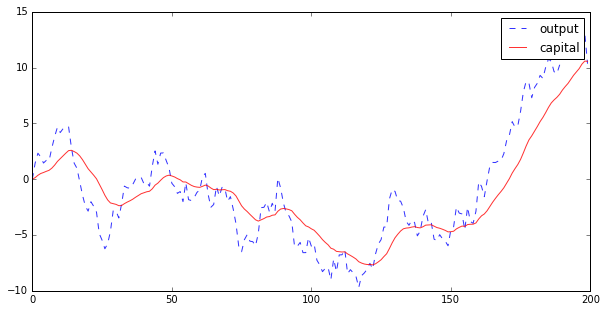

In [19]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Define Parameters for the Model == #
 
# N: number of periods for the transition
# std: st.d of innovation
 
N = 200
std = 1.0
rho = 0.95  
alpha = 0.36
delta = 0.1


phi_1 = (1-delta+alpha*delta)+rho
phi_2 = -(1-delta+alpha*delta)*rho
theta = -(1-delta+alpha*delta)

A_k = np.array(([phi_1,phi_2],[1,0]))    
C_k = np.array(([delta,0])) 
G_k = np.array(([1,0])) 

A_y = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
C_y = np.array(([1+alpha*delta,0,1])) 
G_y = np.array(([1,0,0])) 
    
# == set up the simulation == #

#Simul_shock = np.zeros(N)
#Simul_shock[1]=std
Simul_shock = np.random.normal(0, std, N) # Generate random shock for simulation

Simul_kx = np.zeros((N+1,2))
Simul_kx[0,:]=np.array([0,0])
 

Simul_yx = np.zeros((N+1,3))
Simul_yx[0,:]=np.array([0,0,0])
 

Simul_y = np.zeros(N)
Simul_k = np.zeros(N)
 
for i in range(1,N):    
    Simul_kx[i,:] = np.dot(A_k, Simul_kx[i-1,:])+np.dot(C_k, Simul_shock[i])
    Simul_k[i] = np.dot(G_k, Simul_kx[i,:])
    
    Simul_yx[i,:] = np.dot(A_y, Simul_yx[i-1,:])+np.dot(C_y, Simul_shock[i])
    Simul_y[i] = np.dot(G_y, Simul_yx[i,:])    
     
# == Plot the simulation == #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'b--', alpha=0.8, label = "output")
ax.plot(Simul_k, 'r-', alpha=0.8, label = "capital")

plt.legend()
plt.show()    

# Question 4

(1) Consider the following AR(1) process for the state variable $x_t$

$$ x_{t+1}=\rho x_{t}+ w_{t+1}$$
 
where $\rho\in(0,1)$ and $w_t\sim \mathcal N(0,1)$. 

Write down the conditional forecast formula for $x_{t+j}$  conditional on observing $x_t$, i.e., what is $\mathbb E [x_{t+j}| x_t]$? (This is an analytical question.)

 

(2) Write down the forecast formula of the geometric forecast sum of $x_t$, i.e., what is $\sum_{j=0}^\infty \beta^j \mathbb E  [x_{t+j}| x_t]$? (This is an analytical question.)

(3) Now assume the system is the following ARMA(2,1) process

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t+\theta w_{t-1}$$

Write down the linear state space system for this process. Assume that $\phi_1=-1.8$, $\phi_2=0.81$, $\theta=0.5$, and $w_t\sim \mathcal N(0,1)$. Given $x_t$=1, plot $\mathbb E [x_{t+j}| x_t]$ for $j=0$ to $j=100$.  


#Answer 4#

###(1)###

$x_{t+1} = \rho x_t + w_{t+1}$

Solve this by induction:

$E[x_{t+1}|x_t] = E[\rho x_t + w_{t+1}|x_t]$

$E[\rho x_t|x_t] + E[w_{t+1}|x_t]$

We know that $E[w_{t+1}|x_t]$ because future shocks are uncorrelated to the current state.

Thus: 

$E[x_{t+1}|x_t] = \rho x_t$

$E[x_{t+2}|x_t] = E[\rho x_{t+1} + w_{t+2}|x_t]$

$E[\rho x_{t+1}|x_t] + E[w_{t+2}|x_t]$

Again the expectation of the future shock is equal to zero.

Thus:

$E[x_{t+2}|x_t] = \rho E[x_{t+1}|x_t] = \rho^2 x_t$

Therefore:

$E[x_{t+j}|x_t] = \rho^j x_t$

###(2)### 

$\Sigma_{j=0}^\infty \beta^j E[x_{t+j}|x_t]$

Recall: $E[x_{t+j}|x_t] = \rho^j x_t$

Thus:

$\Sigma_{j=0}^\infty \beta^j E[x_{t+j}|x_t] = \Sigma_{j=0}^\infty \beta^j \rho^j x_t$

$= x_t + \beta \rho x_t + \beta^2 \rho^2 xt + ...$

$= x_t(\frac{1}{1-\beta \rho})$

###(3)###

$$
    x_t=
    \begin{bmatrix}
        y_t \\
        y_{t-1} \\
        w_t \\
    \end{bmatrix}
    \qquad
    A_t = \begin{bmatrix}
              \phi_1 & \phi_2 & \theta \\
              1 & 0 & 0 \\
              0 & 0 & 0 \\
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        1 \\
        0 \\
        1 \\
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
$$

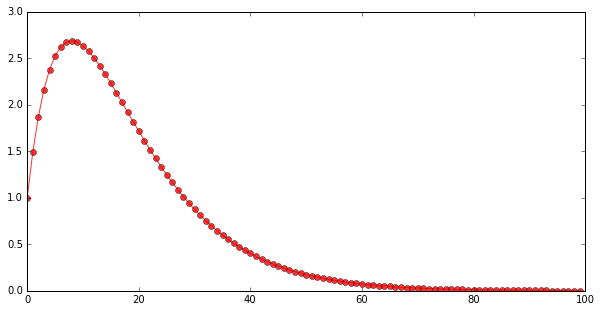

In [43]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Define Parameters for the Model == #
 
# N: number of periods for the transition
# std: st.d of innovation
 
N = 100
std = 1.0
phi_1 = 1.8
phi_2 = -0.81
theta = 0.5

A_y = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
C_y = np.array(([1,0,1])) 
G_y = np.array(([1,0,0])) 
    
# == set up the forecast == #

Initial_yx = np.array(([1,1,1])) 

Forecast_y = np.zeros(N)

Forecast_y[0] = np.dot(G_y, Initial_yx)

Matrix_Ay = np.identity(3)
    
for i in range(1,N):    
    
    Matrix_Ay = np.dot(A_y, Matrix_Ay)
    
    Forecast_y[i] = np.dot(G_y, np.dot(Matrix_Ay, Initial_yx))  
     
# == Plot the simulation == #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Forecast_y, 'ro-', alpha=0.8) 
plt.show()    